# Éléments de symétrie du cristal MgI2
Ce code a pour but d'analyser **la structure** du cristal MgI2 (mp-23205) à partir des données fournies sur site du Materials Project [1].

Le fichier exploité ci-dessous est le fichier CIF du MgI2 [2] téléchargé sur le site du Materials Project et les images sont issues du Jmol Crystal Symetry Explorer [3].

La reflexion théorique sous-jacente à ce code est inspirée du cours *LMAPR1492 - Physique des matériaux*, donné par le professeur Gian-Marco RIGNANESE [4].


In [59]:
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
with MPRester("ktopgq8J6C3OwUSa") as m:
    structure = m.get_structure_by_material_id("mp-23205")  
    sa = SpacegroupAnalyzer(structure)
    #Gives the transformation matrix to transform a conventional unit cell to a primitive cell according to certain standards
    conv = sa.get_conventional_standard_structure()
    sites = conv.sites

Dans cette partie, trois éléments de symétrie du cristal MgI2 vont être étudiés. 

Pour plus de clareté, on va représenter la **maille primitive**.

# Axe de rotation d'ordre 3
L'élément de symétrie n°3 du fichier CIF est un axe de rotation d'ordre 3 dans la direction $[0,0,1]$ et passant par l'origine.

Cet élément de symétrie envoie tout atome situé en (x,y,z) sur un atome équivalent situé en (-y,x-y,z). La matrice qui lui est associé est 
$$S_{03} = \begin{pmatrix} 0 & 1 & 0 \\ 1 & -1 & 0 \\ 0 & 0 & 1 \end{pmatrix}$$
Après transformation, l'atome I, situé initialement en (0.33 0.67 0.22), se situe en (-0.67 -0.34 0.22)

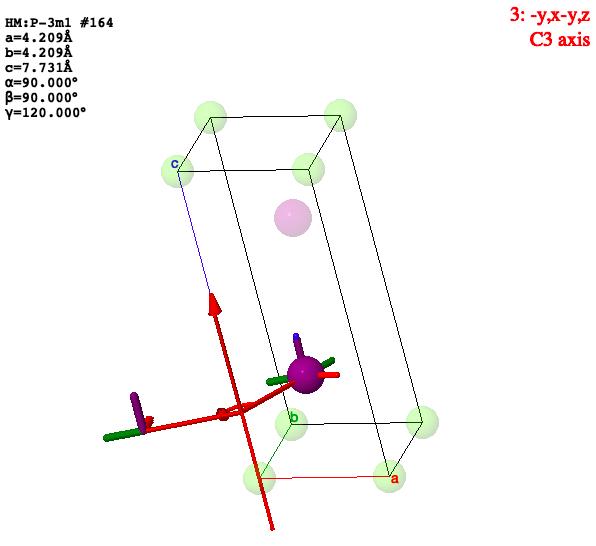

In [60]:
from IPython.display import Image
Image(filename='C3.png')

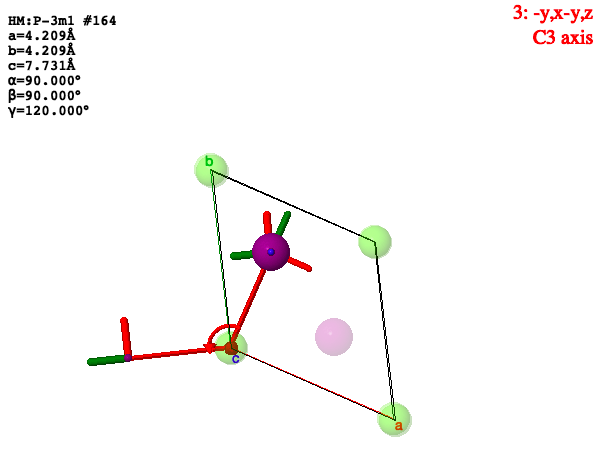

In [61]:
from IPython.display import Image
Image(filename='C3_bis.png')

In [62]:
    symetry1 = SymmOp.from_xyz_string("-y,x-y,z") 
    print(symetry1.affine_matrix)
    pi = sites[1].frac_coords
    print('Application à I situé initialement en ' + str(pi) + ':' + str(symetry1.operate(pi)))

[[ 0. -1.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
Application à I situé initialement en [0.33333333 0.66666667 0.21646143]:[-0.66666667 -0.33333333  0.21646143]


# Plan miroir
L'élément de symétrie n°8 du fichier CIF est un plan miroit perpendiculaire à la direction $[\overline{1},\overline{1},0]$.

Cet élément de symétrie envoie tout atome situé en (x,y,z) sur un atome équivalent situé en (-y,-x,z). La matrice qui lui est associé est 
$$S_{08} = \begin{pmatrix} 0 & -1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 1 \end{pmatrix}$$
Après transformation, l'atome I, situé initialement en (0.67 0.33 0.78), se situe en (-0.33 -0.67 0.78)

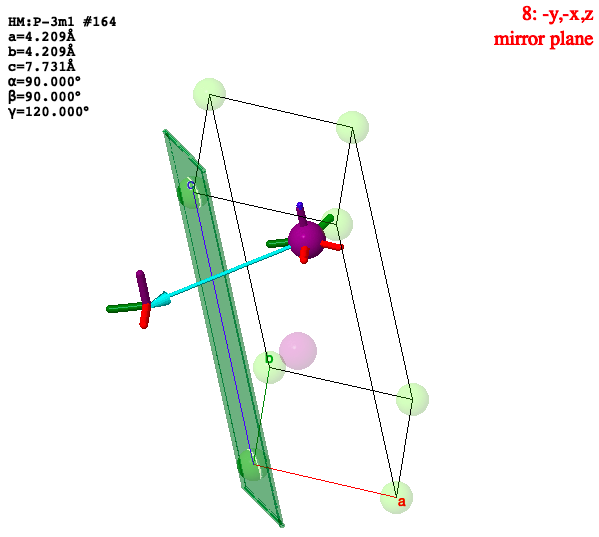

In [63]:
from IPython.display import Image
Image(filename='miroir.png')

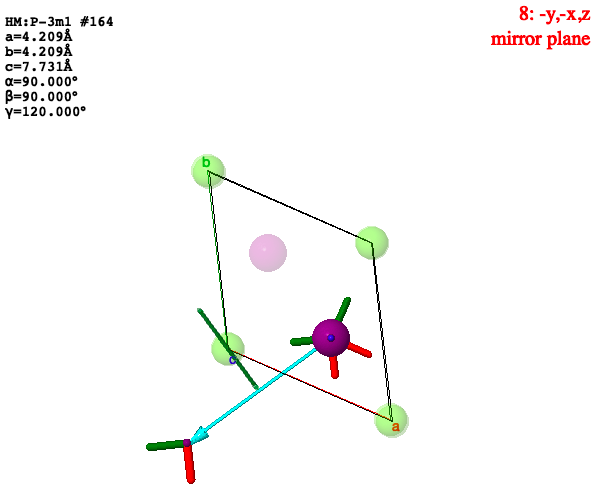

In [64]:
from IPython.display import Image
Image(filename='miroir_bis.png')

In [65]:
    symetry2 = SymmOp.from_xyz_string("-y,-x,z") 
    print(symetry2.affine_matrix)
    pi = sites[2].frac_coords
    print('Application à I situé initialement en ' + str(pi) + ':' + str(symetry2.operate(pi)))

[[ 0. -1.  0.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
Application à I situé initialement en [0.66666667 0.33333333 0.78353857]:[-0.33333333 -0.66666667  0.78353857]


# Rotoinversion d'ordre 3
L'élément de symétrie n°4 du fichier CIF est un axe de rotation d'ordre 3 dans la direction $[0,0,1]$ et passant par l'origine suivit s'une réflection de centre (0,0,0).

Cet élément de symétrie envoie tout atome situé en (x,y,z) sur un atome équivalent situé en (y,-x+y,-z).

La matrice qui lui est associé est 
$$S_{04} = \begin{pmatrix} 0 & 1 & 0 \\ -1 & 1 & 0 \\ 0 & 0 & -1 \end{pmatrix}$$
Après transformation, l'atome Mg, situé initialement en (0 1 0), se situe en (0 1 0)

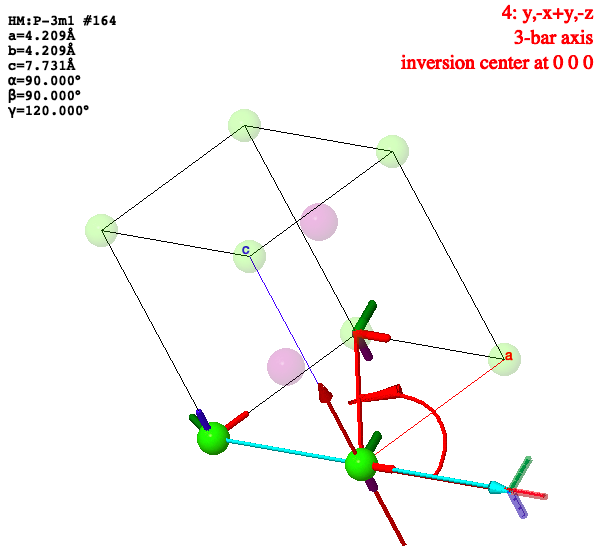

In [66]:
from IPython.display import Image
Image(filename='roto.png')

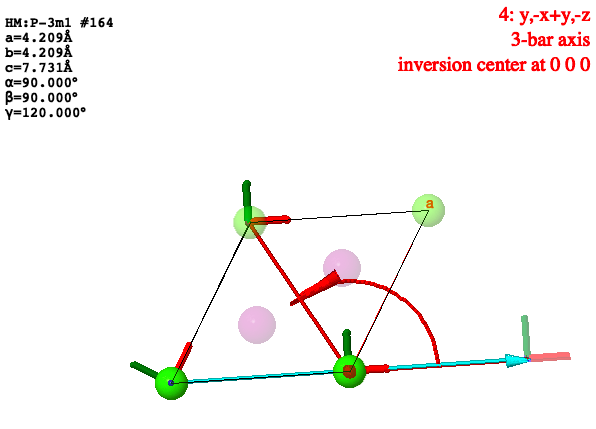

In [67]:
from IPython.display import Image
Image(filename='roto_bis.png')

In [68]:
    symetry3 = SymmOp.from_xyz_string("y,-x+y,-z") 
    print(symetry3.affine_matrix)
    pi = site[0].frac_coords
    print('Application à I situé initialement en [0. 1. 0.] : [0. 1. 0.]')

[[ 0.  1.  0.  0.]
 [-1.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]
Application à I situé initialement en [0. 1. 0.] : [0. 1. 0.]


# Bibliographie
[1] *Materials project mp-23205*, URL: https://materialsproject.org/materials/mp-23205/

[2] *MgI2_mp-23205_symmetrized.cif*, URL: https://github.com/laralej/lmapr1492/blob/master/MgI2_mp-23205_symmetrized.cif

[3] *Jmol crystal symmetry explorer*, URL:  https://www.pslc.ws/jsmol/jcse/explore.htm

[4] *Chapitre 1 : Cristallographie géométrique*, URL: https://moodleucl.uclouvain.be/pluginfile.php/1274322/mod_resource/content/3/Chap-1.pdf 
 